<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
        <img src="../figs/uoc_masterbrand_3linies_positiu.png", align="left">
    </div>
    <div style="float: right; width: 50%;">
        <p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Models avançats de mineria de dades</p>
        <p style="margin: 0; text-align:right;">Màster universitari en Ciència de dades (<i>Data science</i>)</p>
        <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
    </div>
</div>
<div style="width:100%;">&nbsp;</div>

# Exemple de classificació mitjançant arbres de decisió (CART)

## 1. Càrrega del conjunt de dades

En primer lloc, carregarem el conjunt de dades IRIS dataset (Més informació a https://archive.ics.uci.edu/ml/datasets/iris). Aquest es pot descarregar d'Internet o es pot carregar directament de la llibreria `scikit-learn`, que incorpora un conjunt de datasets molt coneguts i utilitzats per a mineria de dades i *machine learning*.

In [1]:
from sklearn import datasets

### Loading the Dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

## 2. Anàlisi exploratòria de les dades

Utilitzant una llibreria gràfica, com per exemple `matplotlib`, farem un gràfic de l'histograma de valors per a cadascun dels atributs, separats pels valors de classe. La finalitat és observar com es distribueix cadascun dels atributs en funció del valor de classe que prenen, per poder identificar de manera visual i ràpida si alguns atributs permeten diferenciar clarament les diferents classes que formen aquest conjunt de dades.

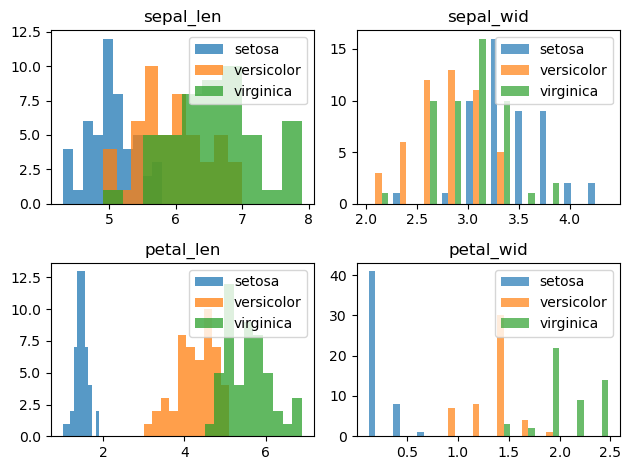

In [2]:
import matplotlib.pyplot as plt

### Exploratory Visualization
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

# sepal_len
for i, key in zip([0, 1, 2], target_names):
    ax0.hist(X[y == i, 0], alpha=0.75, label=key)
ax0.set_title("sepal_len")
ax0.legend(loc="upper right")

# sepal_wid
arr = []
for i in [0, 1, 2]:
    arr.append(X[y == i, 1])
ax1.hist(arr, alpha=0.7, label=target_names)
ax1.set_title("sepal_wid")
ax1.legend(loc="upper right")

# petal_len
for i, key in zip([0, 1, 2], target_names):
    ax2.hist(X[y == i, 2], alpha=0.75, label=key)

ax2.set_title("petal_len")
ax2.legend(loc="upper right")

# petal_wid
arr = []
for i in [0, 1, 2]:
    arr.append(X[y == i, 3])
ax3.hist(arr, alpha=0.7, label=target_names)
ax3.set_title("petal_wid")
ax3.legend(loc="upper right")

fig.tight_layout()
plt.show()

## 3. Reducció de dimensionalitat

En aquesta secció aplicarem dos mètodes de reducció de dimensionalitat al conjunt original de dades. L'objectiu és reduir el conjunt d'atributs a un conjunt nou amb 2 dimensions (en lloc de les 4 que té el conjunt original).

Podem aplicar, entre d'altres:
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)

No cal programar els algorismes. En aquest cas, farem ús de les implementacions disponibles a la llibreria `scikit-learn`.

Generarem un gràfic (en 2D) amb el resultat de cadascun dels mètodes de reducció de la dimensió, per tal de visualitzar si és possible separar eficientment les classes objectiu emprant aquests mètodes de reducció de dimensionalitat.

explained variance ratio (first two components): [0.92461872 0.05306648]


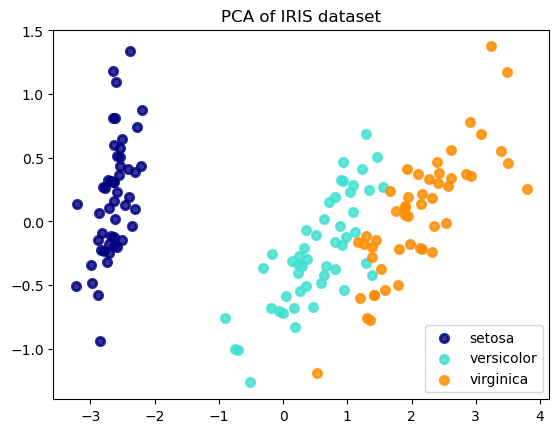

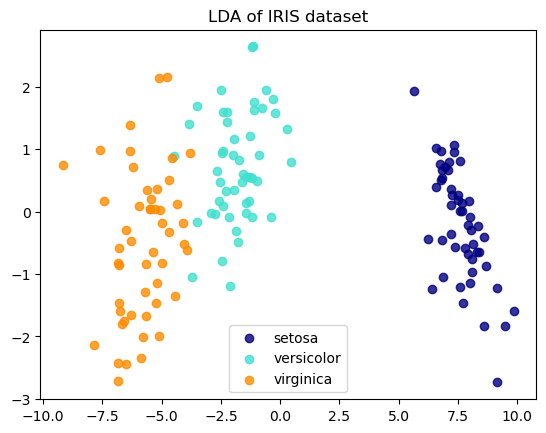

In [3]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

## 4. Aplicació de CART

En aquesta darrera part aplicarem un mètode supervisat, concretament utilitzarem arbres de decisió, per avaluar la precisió obtinguda sobre:

- El conjunt de dades original (amb 4 atributs)
- El conjunt de dades reduït (per exemple, amb el mètode PCA)
- El conjunt de dades reduït (per exemple, amb el mètode LDA)

Noteu que cal generar un conjunt de dades d'entrenament per calibrar el model, i un altre conjunt de test per avaluar la bondat de cadascun dels models creats.

Per simplificar-ne l'exemple, es demana utilitzar els arbres de decisió amb una profunditat màxima limitada a 3 nivells.

Indiqueu els valors obtinguts d'exactitud (*accuracy*, ACC) per a cadascun dels tres models i la matriu de confusió associada.

Original datasets - Accuracy is  95.55555555555556
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
PCA - Accuracy is  97.77777777777777
[[16  0  0]
 [ 0 10  1]
 [ 0  0 18]]
LDA - Accuracy is  100.0
[[16  0  0]
 [ 0 11  0]
 [ 0  0 18]]


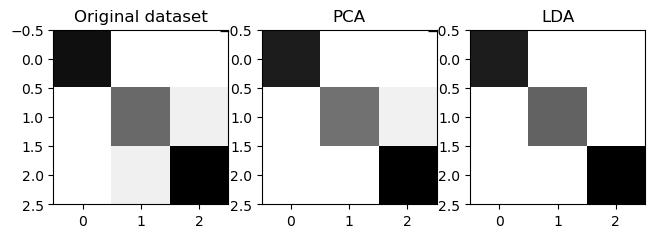

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

iris = datasets.load_iris()

# dataset slicing
X = iris.data
Y = iris.target
target_names = iris.target_names

# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=100
)

clf = DecisionTreeClassifier(
    criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5
)
clf.fit(X_train, y_train)

# ORIGINAL DATASET
y_pred = clf.predict(X_test)
print("Original datasets - Accuracy is ", accuracy_score(y_test, y_pred) * 100)
conf_ori = confusion_matrix(y_test, y_pred)
print(conf_ori)


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_r, Y, test_size=0.3, random_state=100
)

clf = DecisionTreeClassifier(
    criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5
)
clf.fit(X_train, y_train)

# PCA
y_pred = clf.predict(X_test)
print("PCA - Accuracy is ", accuracy_score(y_test, y_pred) * 100)
conf_pca = confusion_matrix(y_test, y_pred)
print(conf_pca)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, Y).transform(X)

# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_r2, Y, test_size=0.3, random_state=100
)

clf = DecisionTreeClassifier(
    criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5
)
clf.fit(X_train, y_train)

# LDA
y_pred = clf.predict(X_test)
print("LDA - Accuracy is ", accuracy_score(y_test, y_pred) * 100)
conf_lda = confusion_matrix(y_test, y_pred)
print(conf_lda)

### plot
fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes.flatten()

ax0.imshow(conf_ori, cmap="binary", interpolation="None")
ax0.set_title("Original dataset")

ax1.imshow(conf_pca, cmap="binary", interpolation="None")
ax1.set_title("PCA")

ax2.imshow(conf_lda, cmap="binary", interpolation="None")
ax2.set_title("LDA")

fig.tight_layout()
plt.show()